In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import os

In [ ]:
path = '/content'
f_list = os.listdir(path)
print(f_list)

['.config', 'train.csv', 'test.csv', 'sample_submission.csv', 'sample_data']


In [ ]:
train = pd.read_csv(os.path.join(path,f_list[1]))
test = pd.read_csv(os.path.join(path,f_list[2]))
sample = pd.read_csv(os.path.join(path,f_list[3]))

In [ ]:
display(train.head())
display(test.head())

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K


,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0,28,Private,67661,Some-college,10,Never-married,Adm-clerical,Other-relative,White,Female,0,0,40,United-States
1,1,40,Self-emp-inc,37869,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
2,2,20,Private,109952,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,25,United-States
3,3,40,Private,114537,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
4,4,37,Private,51264,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,France


In [ ]:
train.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB


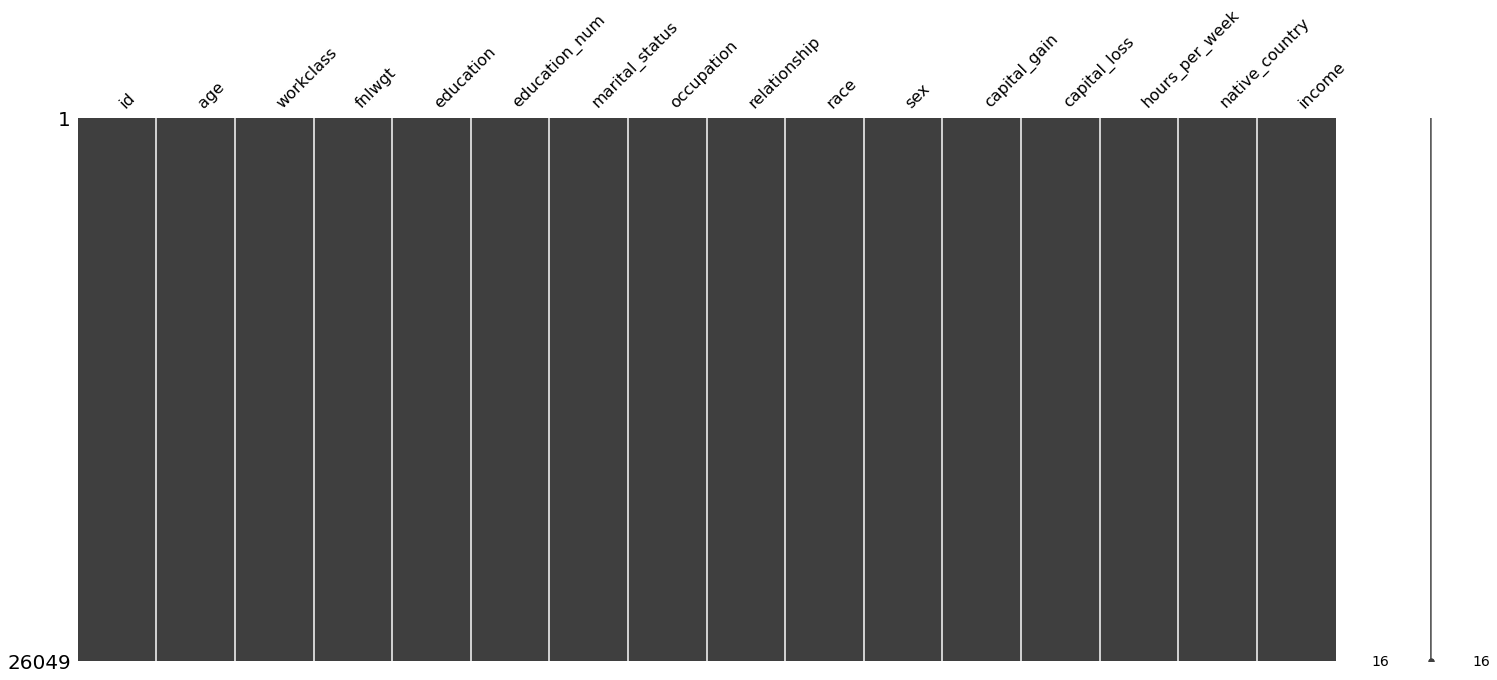

In [ ]:
msno.matrix(train)

In [ ]:
type(train['income'][1])

str

In [ ]:
train.loc[train['income']=='>50K', 'income'] = 1
train.loc[train['income']=='<=50K', 'income'] = 0

In [ ]:
train.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,1
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,0
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,0
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,0
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,0


In [ ]:
train.describe()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26049.000000,26049.000000,2.604900e+04,26049.000000,26049.00000,26049.000000,26049.000000
mean,13024.000000,38.569235,1.903045e+05,10.088372,1087.68970,87.732734,40.443126
std,7519.842917,13.671489,1.059663e+05,2.567610,7388.85469,403.230205,12.361850
min,0.000000,17.000000,1.376900e+04,1.000000,0.00000,0.000000,1.000000
25%,6512.000000,28.000000,1.181080e+05,9.000000,0.00000,0.000000,40.000000
50%,13024.000000,37.000000,1.788660e+05,10.000000,0.00000,0.000000,40.000000
75%,19536.000000,48.000000,2.377350e+05,12.000000,0.00000,0.000000,45.000000
max,26048.000000,90.000000,1.484705e+06,16.000000,99999.00000,4356.000000,99.000000


In [ ]:
train.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [ ]:
train.describe().columns

Index(['id', 'age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [ ]:
set(train.columns).difference(set(train.describe().columns))

{'education',
 'income',
 'marital_status',
 'native_country',
 'occupation',
 'race',
 'relationship',
 'sex',
 'workclass'}

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB


In [ ]:
train['education'].value_counts()

HS-grad         8433
Some-college    5800
Bachelors       4344
Masters         1378
Assoc-voc       1096
11th             922
Assoc-acdm       842
10th             731
7th-8th          505
Prof-school      466
9th              418
12th             359
Doctorate        316
5th-6th          265
1st-4th          134
Preschool         40
Name: education, dtype: int64

# Education
- HS-grad         8433
- Some-college    5800
- Bachelors       4344
- Masters         1378
- Assoc-voc       1096
- 11th             922
- Assoc-acdm       842
- 10th             731
- 7th-8th          505
- Prof-school      466
- 9th              418
- 12th             359
- Doctorate        316
- 5th-6th          265
- 1st-4th          134
- Preschool         40

In [ ]:
edu = list(train['education'].values)

In [ ]:
print(edu)

['HS-grad', '9th', 'Some-college', 'Some-college', 'Some-college', 'HS-grad', 'Bachelors', '11th', 'HS-grad', 'Some-college', '1st-4th', 'Some-college', 'Some-college', '11th', '5th-6th', 'HS-grad', 'Bachelors', 'HS-grad', 'Bachelors', 'Bachelors', 'Assoc-acdm', 'Bachelors', '10th', 'Assoc-acdm', 'HS-grad', 'HS-grad', 'HS-grad', 'HS-grad', 'Bachelors', 'Bachelors', 'Some-college', 'HS-grad', '5th-6th', 'Some-college', 'HS-grad', '5th-6th', 'Some-college', '10th', '1st-4th', 'Prof-school', '11th', '9th', 'Bachelors', '7th-8th', 'HS-grad', 'Some-college', 'HS-grad', 'Bachelors', 'Masters', 'Some-college', 'Bachelors', 'Bachelors', 'Assoc-voc', 'Prof-school', 'Bachelors', 'HS-grad', 'Doctorate', 'HS-grad', 'Bachelors', 'Bachelors', 'Assoc-voc', 'Masters', 'HS-grad', 'Assoc-acdm', '9th', 'Masters', 'HS-grad', 'HS-grad', 'Bachelors', 'HS-grad', 'Bachelors', 'Some-college', 'Some-college', '11th', 'HS-grad', 'Bachelors', 'Some-college', 'HS-grad', 'Some-college', 'Some-college', 'HS-grad', '

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 데이터에서 특징 찾기(범주의 수
le.fit(edu)

#데이터 변환
train['education'] = le.transform(train['education'])

In [ ]:
def to_cat(label,data):
  le = LabelEncoder()
  val = list(data[label].values)
  le.fit(val)
  data[label] = le.transform(data[label])

In [ ]:
for i in [train, test]:
  for j in ['marital_status', 'native_country', 'occupation', 'race', 'relationship', 'sex', 'workclass']:
    to_cat(j,i)

In [ ]:
train.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,4,168538,11,9,2,12,0,4,1,0,0,60,38,1
1,1,17,4,101626,6,5,4,7,3,4,1,0,0,20,38,0
2,2,18,4,353358,15,10,4,8,3,4,1,0,0,16,38,0
3,3,21,4,151158,15,10,4,10,3,4,0,0,0,25,38,0
4,4,24,4,122234,15,10,4,1,1,2,0,0,0,20,0,0


In [ ]:
le.classes_

array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
       'Masters', 'Preschool', 'Prof-school', 'Some-college'],
      dtype='<U12')

In [ ]:
train['workclass'].value_counts()

Private             18123
Self-emp-not-inc     2030
Local-gov            1692
?                    1502
State-gov            1043
Self-emp-inc          877
Federal-gov           765
Without-pay            11
Never-worked            6
Name: workclass, dtype: int64

In [ ]:
y = train.pop('income')

In [ ]:
train_id = train.pop('id')
test_id = test.pop('id')

In [ ]:
test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,28,4,67661,Some-college,10,4,1,2,4,0,0,0,40,39
1,40,5,37869,HS-grad,9,2,4,0,4,1,0,0,50,39
2,20,4,109952,Some-college,10,4,6,3,4,1,0,0,25,39
3,40,4,114537,Assoc-voc,11,2,4,0,4,1,0,0,50,39
4,37,4,51264,Doctorate,16,2,10,0,4,1,0,0,99,10


In [ ]:
to_cat('education',test)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_jobs=-1)
xgb.fit(train,y)
pred = xgb.predict(test)

In [ ]:
sample.head()

,id,prediction
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [ ]:
prd = pd.DataFrame({'id':range(len(pred)),'prediction':pred})

In [ ]:
prd.to_csv('first.csv',index=False)

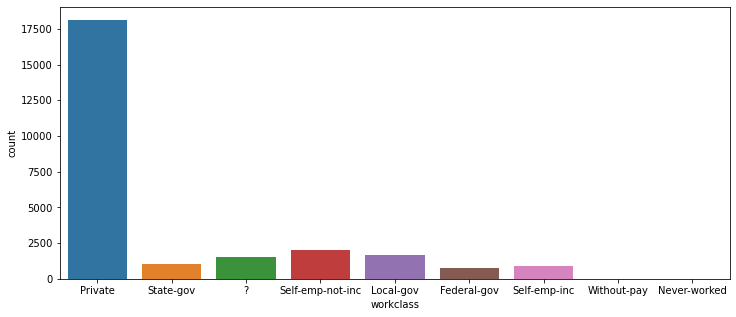

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(12,5))
sns.countplot(data=train, x='workclass')
plt.show()

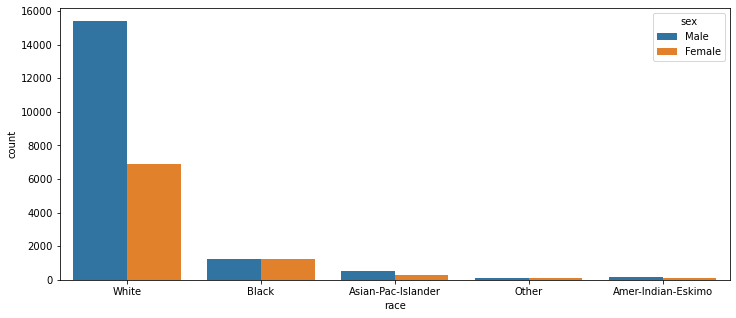

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(12,5))
sns.countplot(data=train, x='race',hue='sex')   # hue 색상
plt.show()

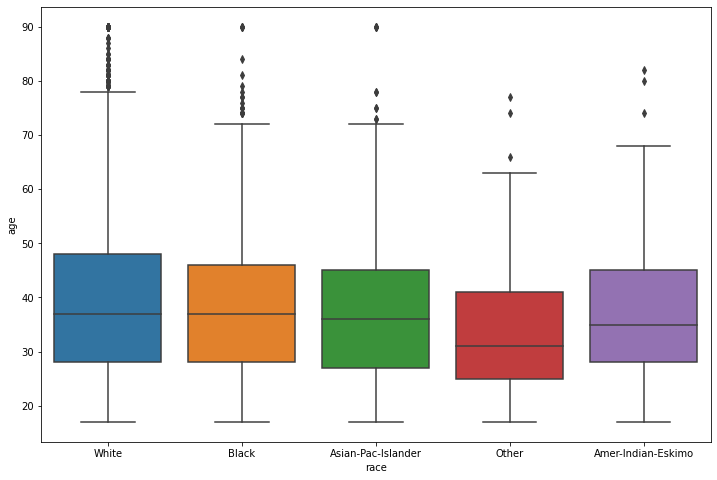

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.boxplot(data=train, x='race',y = 'age')
plt.show()

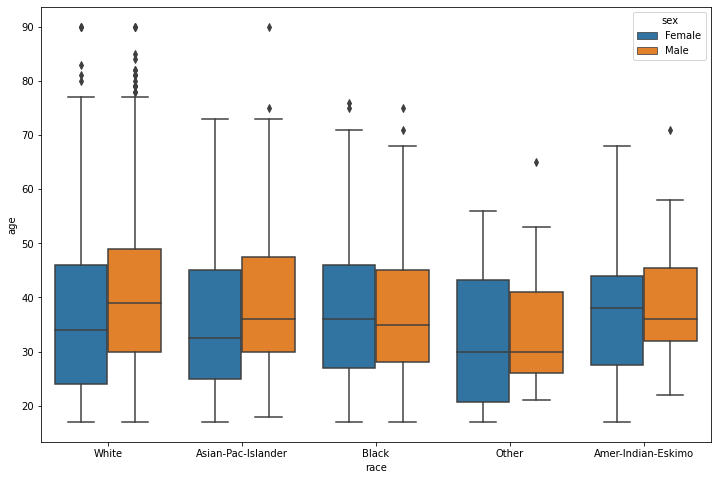

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.boxplot(data=test, x='race',y = 'age',hue='sex')
plt.show()

In [ ]:
corr = train.corr()

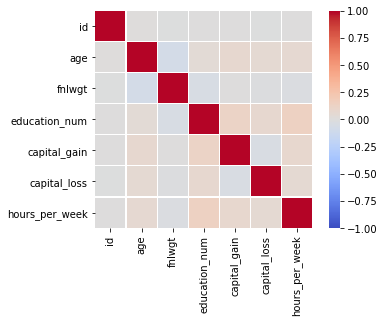

In [ ]:
sns.heatmap(corr, square=True, linewidth=0.1, cmap='coolwarm',
           vmax=1.0, vmin=-1.0)

In [ ]:
!pip install dabl

     |████████████████████████████████| 566 kB 585 kB/s eta 0:00:01
  Created wheel for dabl: filename=dabl-0.1.9-py3-none-any.whl size=572788 sha256=c6e25aed768ddedc7840fefb18e9779890fe3254ea4bbc723805f30cba0ef7eb
  Stored in directory: /root/.cache/pip/wheels/aa/38/8f/66d5e159658b37cb0b8f9176a9f584f14bcd5ea0c1e96011bf
Successfully built dabl


In [ ]:
import dabl
dabl.detect_types(train,target_col='income')

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
id,False,False,False,False,False,False,True
age,False,False,True,False,False,False,False
workclass,False,False,False,True,False,False,False
fnlwgt,True,False,False,False,False,False,False
education,False,False,False,True,False,False,False
education_num,False,False,True,False,False,False,False
marital_status,False,False,False,True,False,False,False
occupation,False,False,False,True,False,False,False
relationship,False,False,False,True,False,False,False
race,False,False,False,True,False,False,False


In [ ]:
types = dabl.detect_types(train,target_col='income')

In [ ]:
print('#####categorical values#####')
for i in type.loc(types['categorical']==True):
    print(i,end=',')

#####categorical values#####


TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [ ]:
ttt = types[types['categorical']==True].iloc[:,:0]
types[types['categorical']==True].iloc[:,:0]

""
workclass
education
marital_status
occupation
relationship
race
sex
native_country
income


In [ ]:
for i in ttt.index:
    print(i)

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [ ]:
train.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K
